In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 # Table of Contents
 ## 1. Sample Data
 * 1.1. Iris Data
 * 1.2. Newsgroup Text Data
 * 1.3. Olivetti Faces
 * 1.4. Labeled Faces in the Wild (LFW)
 * 1.5. LFW pairs
 * 1.6. Digits data
 * 1.7. MNIST

 ## 2. 
 

# 1. Sample Data

## 1.1. Iris Data

* **Feature**
  * Sepal Length
  * Sepal Width
  * Petal Length
  * Petal Width
* **Target**
  * setosa, versicolor, virginica

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [14]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


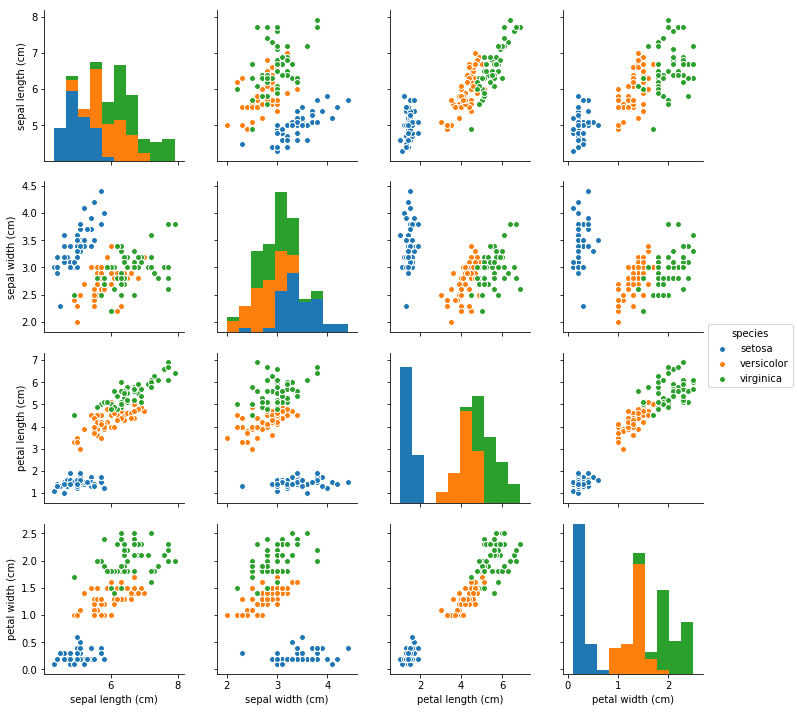

In [15]:
sns.pairplot(df, hue="species")
plt.show()

## 1.2. Newsgroup Text Data

* **Feature**
  * Text  
* **Target**
  * Newsgroup

In [16]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all')
print(newsgroups.description)
print(newsgroups.keys())

the 20 newsgroups by date dataset
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])


In [17]:
from pprint import pprint
pprint(list(newsgroups.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [18]:
print(newsgroups.data[1])
print("=" * 80)
print(newsgroups.target_names[newsgroups.target[1]])

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   

comp.sys.ibm.pc.hardware


## 1.3. Olivetti Faces

* **Feature**
  * 64X64 B&W Images
* **Target**
  * ID Number (each representing one of 40 people)

In [19]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
print(olivetti.DESCR)
print(olivetti.keys())

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/gwangbinbae/scikit_learn_data
Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.

dict_keys(['data', 'images', 'target', 'DESCR'])


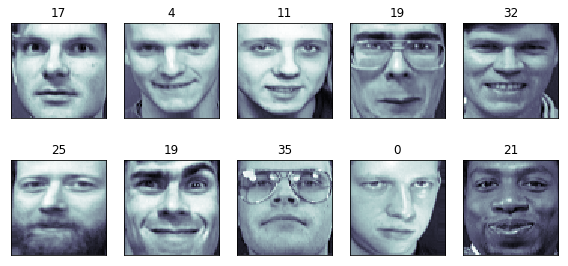

In [22]:
np.random.seed(0)
N=2; M=5;
fig = plt.figure(figsize=(8,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(olivetti.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(olivetti.images[k], cmap=plt.cm.bone);
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(olivetti.target[k])
plt.tight_layout()
plt.show()

## 1.4. Labeled Faces in the Wild (LFW)

* **Parameters**
  * `funneled` : Default=`True`
  * `resize` : Default=`0.5`
  * `min_faces_per_person` : Default=`None`
  * `color` : Default=`False`
* **Feature**
  * Images  
* **Target**
  * Name

In [27]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(lfw_people.DESCR)
print(lfw_people.keys())

LFW faces dataset
dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


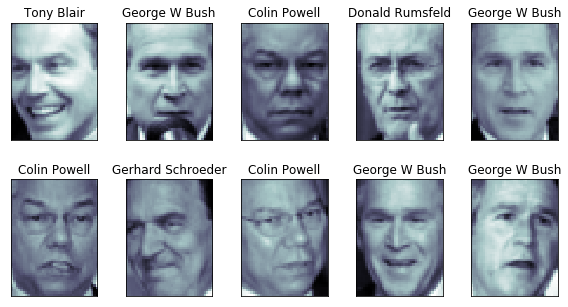

In [28]:
np.random.seed(0)
N=2; M=5;
fig = plt.figure(figsize=(8,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0.1, wspace=0.05)
klist = np.random.choice(range(len(lfw_people.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(lfw_people.images[k], cmap=plt.cm.bone);
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(lfw_people.target_names[lfw_people.target[k]])
plt.tight_layout()
plt.show()        

## 1.5. LFW pairs
* Feature
  * Pair of Images
* Target
  * Whether they are the images of a same person or not
  * `True` or `False`

In [29]:
from sklearn.datasets import fetch_lfw_pairs
lfw_pairs = fetch_lfw_pairs(resize=0.4)
print(lfw_pairs.DESCR)
print(lfw_pairs.keys())

'train' segment of the LFW pairs dataset
dict_keys(['data', 'pairs', 'target', 'target_names', 'DESCR'])


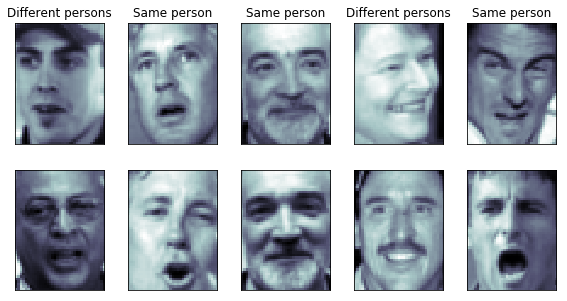

In [30]:
np.random.seed(0)
N=2; M=5;
fig = plt.figure(figsize=(8,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0.01, wspace=0.05)
klist = np.random.choice(range(len(lfw_pairs.data)), M)
for j in range(M):
    k = klist[j]
    ax1 = fig.add_subplot(N, M, j+1)
    ax1.imshow(lfw_pairs.pairs [k][0], cmap=plt.cm.bone);
    ax1.grid(False)
    ax1.xaxis.set_ticks([])
    ax1.yaxis.set_ticks([])
    plt.title(lfw_pairs.target_names[lfw_pairs.target[k]])
    ax2 = fig.add_subplot(N, M, j+1 + M)
    ax2.imshow(lfw_pairs.pairs [k][1], cmap=plt.cm.bone);
    ax2.grid(False)
    ax2.xaxis.set_ticks([])
    ax2.yaxis.set_ticks([])
plt.tight_layout()
plt.show()    

## 1.6. Digits data
* **Feature**
  * 8X8 B&W Images of Handwritten numbers
  * Brightness ranges from 0~15
* **Target**
  * 0~9

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)
print(digits.keys())

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

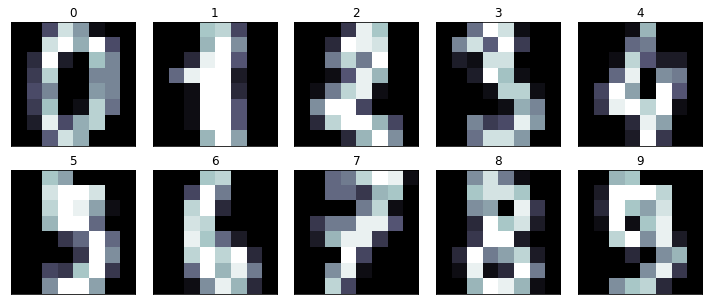

In [32]:
np.random.seed(0)
N=2; M=5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])
plt.tight_layout()
plt.show()

## 1.7. MNIST (download using `fetch_mldata()`)
* Go to [here](http://mldata.org) and search for useful dataset
* **Feature**
  * 28X28 Images
* **Target**
  * 0~9

In [33]:
from sklearn.datasets.mldata import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

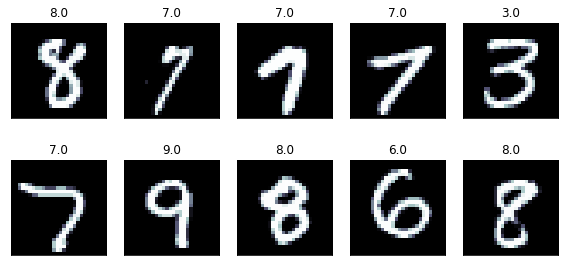

In [34]:
N=2; M=5;
fig = plt.figure(figsize=(8,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(mnist.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(mnist.data[k].reshape(28, 28), cmap=plt.cm.bone, interpolation="nearest");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(mnist.target[k])
plt.tight_layout()
plt.show()        

# 2. Generate Data for Classification

## 2.1. `make_classification`

```
X, y = make_classification(
    n_samples=100, n_features=20, n_informative=2, 
    n_redundant=2, n_repeated=0, n_classes=2, 
    n_clusters_per_class=2, weights=None, random_state=None)
```

* **Parameters**:	
  * n_samples : int. Default=`100`
  * n_features : int. Default=`20`
  * n_informative : int. Default=`2`
  * n_redundant : int. Default=`2`
  * n_repeated : int. Default=`0`
  * n_classes : int. Default=`2`
  * n_clusters_per_class : int. Default=`2`
  * weights : list of floats. Default=`None`
    * The proportions of samples assigned to each class
  * random_state : Default=`None`
    
* **Return**:	
  * X : [n_samples, n_features] sized array 
  * y : [n_samples] sized array

In [35]:
from sklearn.datasets import make_classification

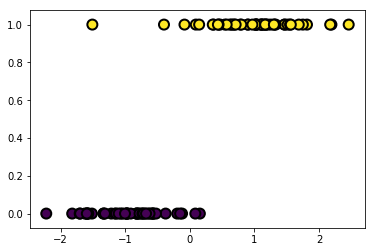

In [36]:
X, y = make_classification(n_features=1, n_informative=1, 
                           n_redundant=0, n_clusters_per_class=1, random_state=4)
plt.scatter(X, y, marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

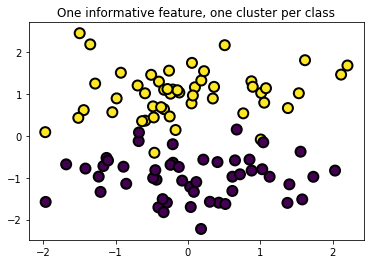

In [37]:
plt.title("One informative feature, one cluster per class")
X, y = make_classification(n_features=2, n_informative=1, n_redundant=0, 
                           n_clusters_per_class=1, random_state=4)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

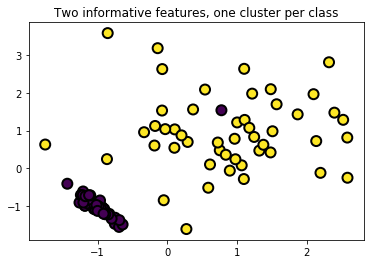

In [38]:
plt.title("Two informative features, one cluster per class")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

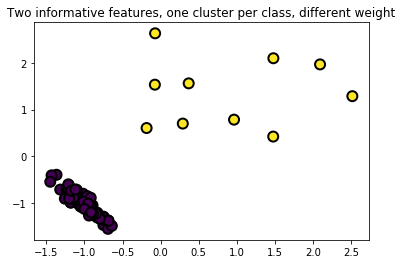

In [39]:
plt.title("Two informative features, one cluster per class, different weight")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.9, 0.1], random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

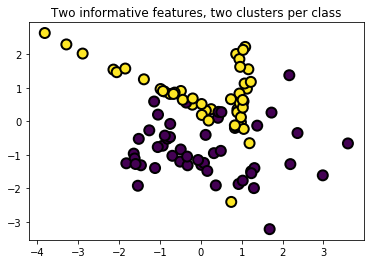

In [40]:
plt.title("Two informative features, two clusters per class")
X2, Y2 = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                             random_state=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

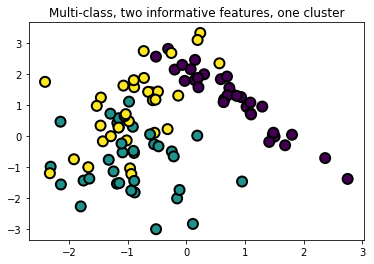

In [41]:
plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

## 2.2. `make_blobs`

```
X, y = make_blobs(n_samples=100, n_features=2, centers=3, 
                  cluster_std=1.0, center_box=(-10.0, 10.0), 
                  shuffle=True, random_state=None)
```
   
* **Parameters**:	
 * n_samples : int. Default=`100`
 * n_features : int. Default=`20`
 * centers : int. or [n_centers, n_features] sized array. Default=`3`
 * cluster_std: float. or sequence of floats. Default=`1.0`
 * center_box: pair of floats. Default=(-10.0, 10.0)) 
   * bounding box
    
* **Return**:	
  * X : [n_samples, n_features] sized array
  * y : [n_samples] sized array 

In [42]:
from sklearn.datasets import make_blobs

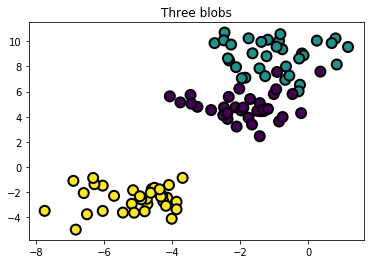

In [43]:
plt.title("Three blobs")
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=100,
            edgecolor="k", linewidth=2)
plt.show()